In [31]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
# import ROOT
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [32]:

# uni = "vtx_type1_16f_4h_200n_9l_mu0_e1_0516" 

# uni = "pid_mu0_e1_allMeV_nopadding_1_64_8_64_100" 
# uni = "pid_mu0_e1_500MeV_nopadding_1_64_8_64_100" 

uni = "eng_padding_1_64_8_64_200_7l_mu"
uni = "eng_padding_1_64_8_64_200_7l_elec"

path = "/users/hep/yewzzang/work/KNO_reconstruction/combined/result_eng/*"+uni +"*/*"+uni +".csv"

pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]

In [33]:
df = pd.read_csv(pred_list[0])

In [34]:
pred = np.array(df['prediction']).reshape(-1,1)
label = np.array(df['label']).reshape(-1,1)
fname = np.array(df['fname']).reshape(-1,1)

In [42]:
mean_energy = np.mean((pred-label)/label)

# 표준 편차 계산
std_deviation = np.std((pred-label)/label)

# 에너지 분해능 계산
energy_resolution = (std_deviation / mean_energy) * 100

# 결과 출력
print(f"Mean Energy: {mean_energy}")
print(f"Standard Deviation: {std_deviation}")
print(f"Energy Resolution: {energy_resolution}%")

Mean Energy: -0.008167452048952879
Standard Deviation: 0.047525580771241895
Energy Resolution: -581.8899270713807%


In [44]:

mean_energy = np.mean(((pred[fname==500]-label[fname==500])/label[fname==500]))

# 표준 편차 계산
std_deviation = np.std(((pred[fname==500]-label[fname==500])/label[fname==500]))

# 에너지 분해능 계산
energy_resolution = (std_deviation / mean_energy) * 100

# 결과 출력
print(f"Mean Energy: {mean_energy}")
print(f"Standard Deviation: {std_deviation}")
print(f"Energy Resolution: {energy_resolution}%")

Mean Energy: -0.009867596754469354
Standard Deviation: 0.050711574672901494
Energy Resolution: -513.9202171991126%


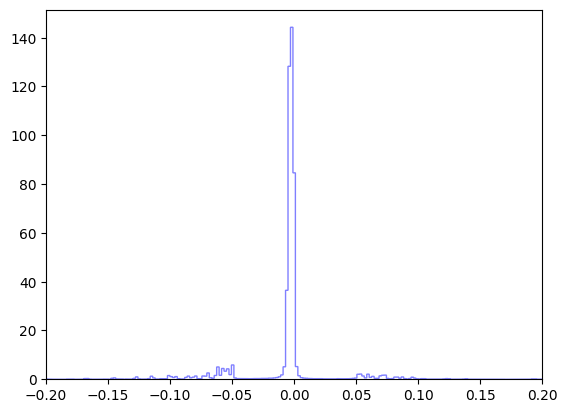

In [41]:
plt.hist((pred-label)/label,bins=1000,color='b', alpha = 0.5, density = True, histtype = 'step')
plt.xlim([-0.2,0.2])
plt.show()

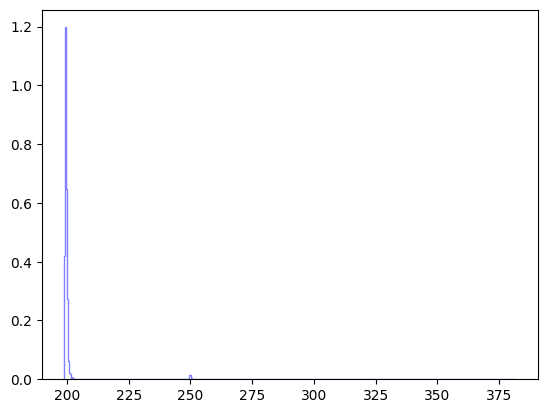

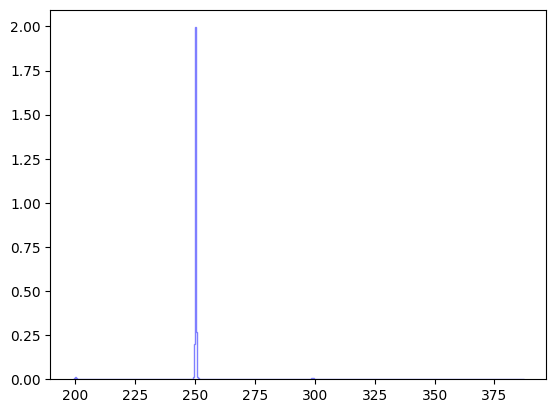

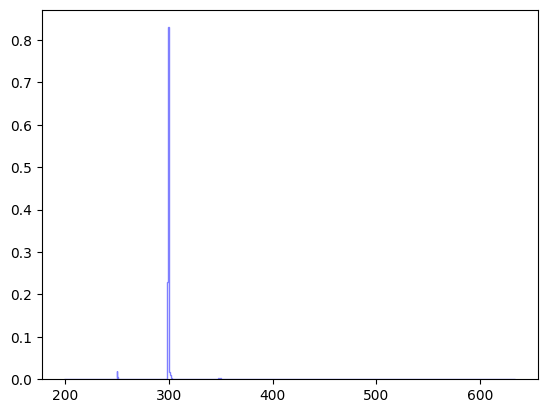

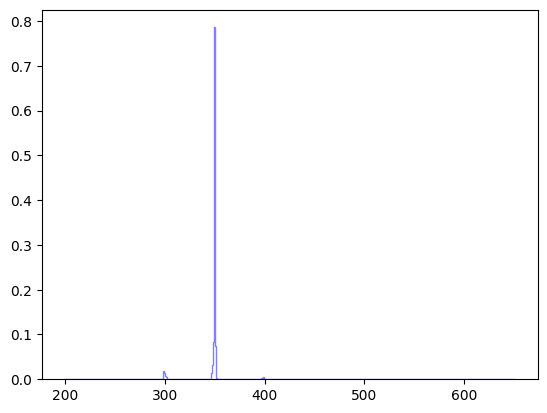

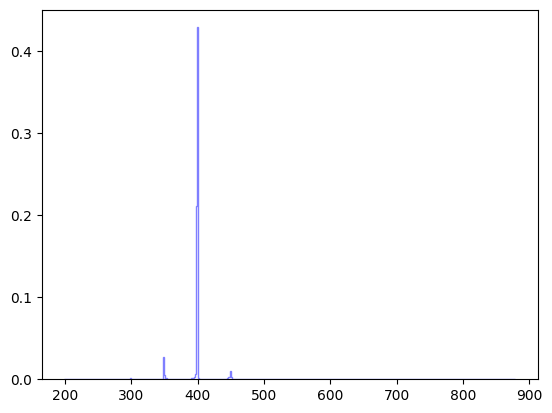

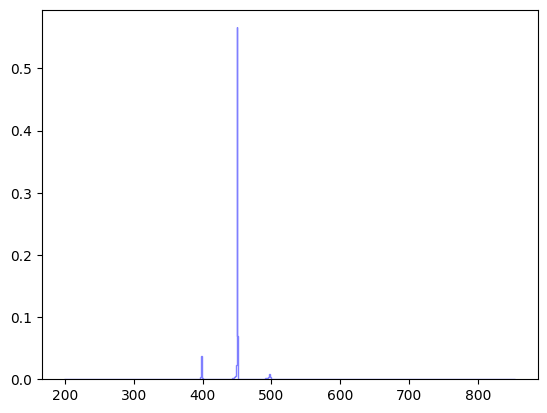

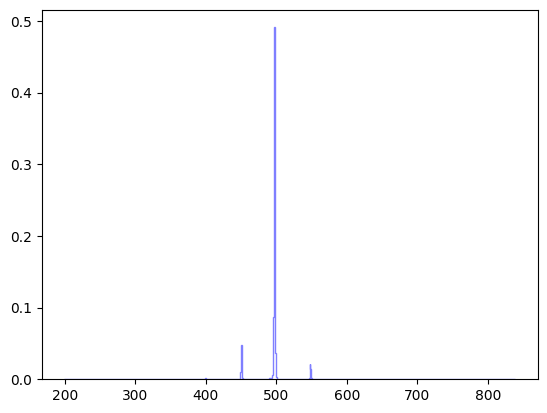

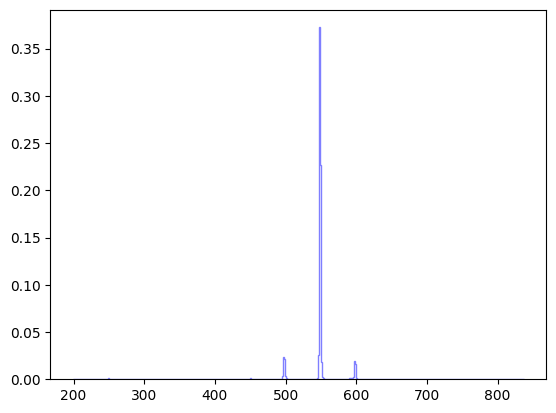

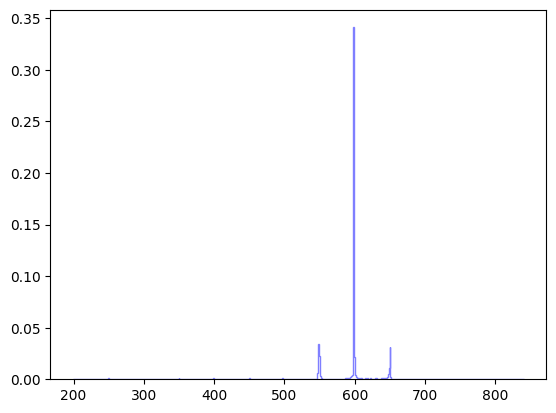

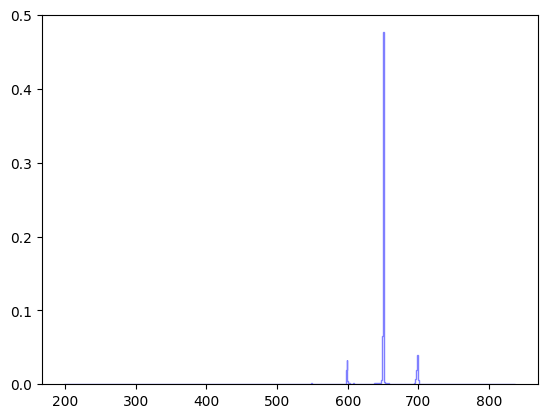

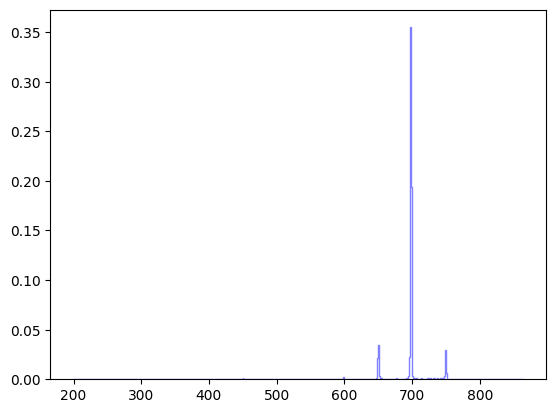

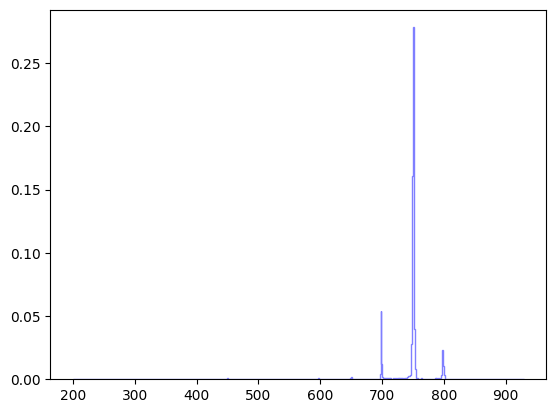

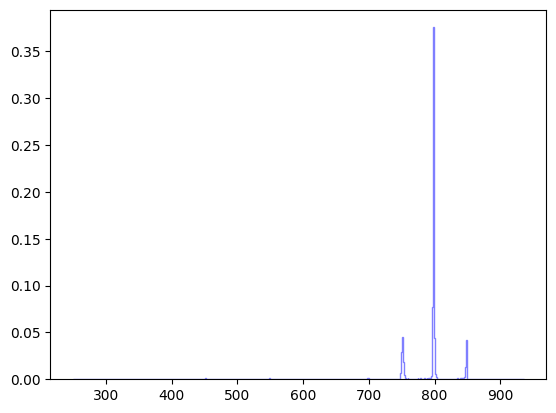

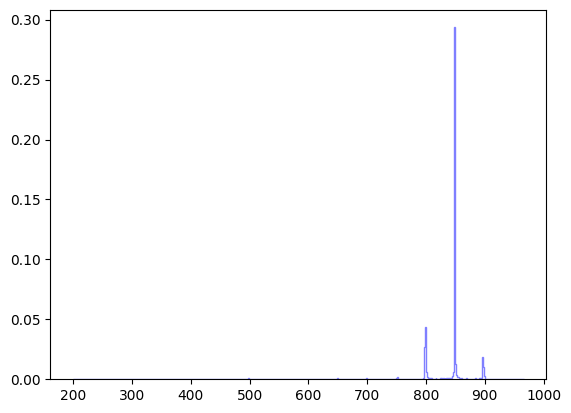

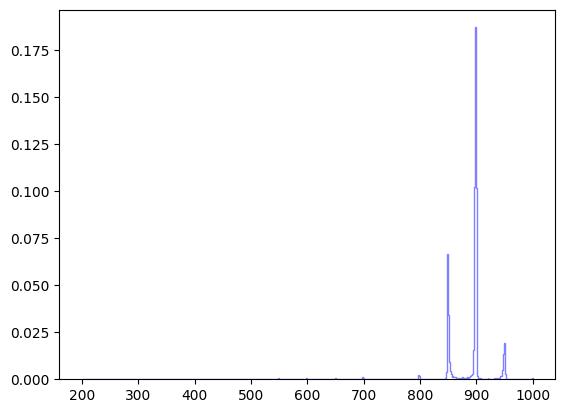

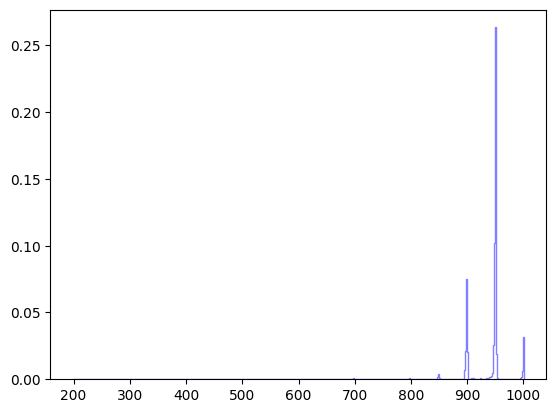

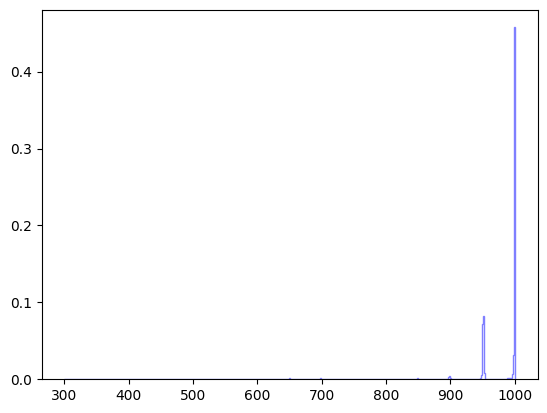

In [36]:
for energy in range(200,1050,50):
    plt.hist(pred[fname==energy],bins=500,color='b', alpha = 0.5, density = True, histtype = 'step')
    # plt.hist(label[fname==200],bins=50,color='r', alpha = 0.5, density = True, histtype = 'step')
    plt.show()

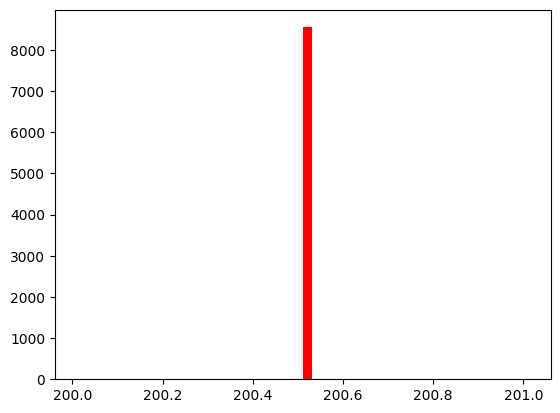

In [37]:
plt.hist(label[fname==200],bins=50,color='r')
plt.show()

In [38]:
pred[fname==200]

array([199.92572021, 200.60684204, 199.52285767, ..., 200.13772583,
       199.67596436, 199.28895569])